Physically Feasible Dynamic Parameter Identification of the WAM Robot 7-DOF
===========================================================================

[![DOI](https://zenodo.org/badge/doi/10.5281/zenodo.10534.png)](http://dx.doi.org/10.5281/zenodo.10534)

_Research notebook from the paper:_

**Sousa, Cristóvão D. and Cortesão, Rui, "Physically feasible dynamic parameter identification of the 7-DOF WAM robot," Intelligent Robots and Systems (IROS), 2013 IEEE/RSJ International Conference on , pp.2868-2873, 3-7 Nov. 2013, Tokyo, Japan, doi: [10.1109/IROS.2013.6696762](http://dx.doi.org/10.1109/IROS.2013.6696762)**



------------------------


Authors
-------

- Cristóvão D. Sousa, [crisjss@gmail.com](mailto:crisjss@gmail.com)
- Rui Cortesão, [cortesao@isr.uc.pt](mailto:cortesao@isr.uc.pt)

------------------------


Research Notebook
-----------------

The research is done in [Python](http://www.python.org/) within an [IPython notebook](http://ipython.org/notebook.html) (the *Paper IROS2013 - Phys Feas Dyn Param Ident 7-DOF WAM Rob.ipynb* file).
Data is in *data* folder. Additional Python support code is in *support_funcs* folder

The file *Paper IROS2013 - Phys Feas Dyn Param Ident 7-DOF WAM Rob.html* is a **preview** of the notebook. **It can be seen online at:**

**[Paper IROS2013 - Phys Feas Dyn Param Ident 7-DOF WAM Rob](http://goo.gl/8Xv6Mj)**


Presentation
------------

The slides and movies presented at IROS 2013 are avalable online [here](http://goo.gl/U9YmE5).


Paper Correction
----------------

The published paper presents a physically feasible base parameter solution ("beta star", rightmost column of Table I) which was obtained not taking the friction parameter positiveness constraints into account, contrary to what is shown in equation (17).
In this notebook, both the paper solution (without positiveness constraints on friction parameters) and the correct solution (with positiveness constraints on friction parameters) are computed and presented (to distinguish,  variable names are suffixed with the words "paper" and "correct", respectivelly). Nevertheless, the differences between both solutions (with exception to the corrected friction parameter) are very small, arround 1%. 


How to run the code
-------------------

- clone the git repository (it contains code and data) from https://github.com/cdsousa/IROS2013-Feas-Ident-WAM7
- open the *Paper IROS2013 - Phys Feas Dyn Param Ident 7-DOF WAM Rob.ipynb* notebook with [IPython](http://ipython.org/)
- edit and run the code

Dependencies:

- [Python](http://www.python.org/)
- [IPython](http://ipython.org/)
- [SymPy](http://sympy.org/)
- [Numpy](http://www.numpy.org/)
- [SciPy](http://www.scipy.org/)
- [SymPyBotics](https://github.com/cdsousa/SymPyBotics) (developed by the author Cristóvão D. Sousa)
- [PyLMI-SDP](https://github.com/cdsousa/PyLMI-SDP) (developed by the author Cristóvão D. Sousa)

------------------------


Questions & Feedback
--------------------

Although being open source, the code can lack some better documentation.
Feel free to contact the authors at [crisjss@gmail.com](mailto:crisjss@gmail.com)
We are open to help you to deploy this code or even your own implementation of the proposed algorithms.


------------------------


License
-------

Copyright (c) 2013, Cristóvão Duarte Sousa, Rui Cortesão

All rights reserved.

[![Creative Commons License](http://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png)](http://creativecommons.org/licenses/by-nc-sa/4.0/)
This work is licensed under a [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License](http://creativecommons.org/licenses/by-nc-sa/4.0/)


---------------

---------------

---------------

---------------

# Initializations

In [3]:
datafolder = 'data/'
tmpfolder = 'tmp/'

In [4]:
from sympy import init_printing
init_printing()

%pylab inline

Populating the interactive namespace from numpy and matplotlib


1 - Robot Model
===============

In [6]:
import sympybotics

#### Robot Definition

In [7]:
rbtdef = sympybotics.RobotDef("UR10",
            [(0, 0, 0.128, "q"),
             ("-pi/2", 0, 0.176, "q-pi/2"),
             (0, 0.612, -0.128, "q"),
             (0, 0.572, 0.116, "q+pi/2"),
             ("pi/2", 0, 0.116, "q"),
             ("-pi/2", 0, 0.092, "q")],
            dh_convention="mdh")

rbtdef.frictionmodel = {}

#### Model Generation

In [8]:
%time rbt = sympybotics.RobotDynCode(rbtdef)
%time rbt.calc_base_parms()

CPU times: user 6.91 s, sys: 17.9 ms, total: 6.93 s
Wall time: 7 s
CPU times: user 7.78 s, sys: 986 ms, total: 8.76 s
Wall time: 6.79 s


In [9]:
import pickle
with open(tmpfolder + 'robotmodels/ur10_model.pkl', 'wb') as file:
    pickle.dump( rbt, file )

## Base Dynamic Parameters

In [10]:
import pickle
with open(tmpfolder +  'robotmodels/ur10_model.pkl', 'rb' ) as file:
          rbt = pickle.load( file )

In [11]:
rbt.dyn.n_dynparms, rbt.dyn.n_base

(60, 36)

In [24]:
rbt.dyn.baseparms.n()

Matrix([
[L_1zz + L_2yy + L_3yy + L_4yy + 0.352*l_2z + 0.096*l_3z + 0.328*l_4z + 0.030976*m_2 + 0.376848*m_3 + 0.728624*m_4 + 0.728624*m_5 + 0.728624*m_6],
[                                                                      L_2xx - L_2yy - 0.374544*m_3 - 0.374544*m_4 - 0.374544*m_5 - 0.374544*m_6],
[                                                                                                                                          L_2xy],
[                                                    L_2xz - 0.612*l_3z - 0.612*l_4z + 0.078336*m_3 + 0.007344*m_4 + 0.007344*m_5 + 0.007344*m_6],
[                                                                                                                                          L_2yz],
[                                                                              L_2zz + 0.374544*m_3 + 0.374544*m_4 + 0.374544*m_5 + 0.374544*m_6],
[                                                                                           l_2x + 0.612*m_3 

# 2 - Excited Trajectory Optimization

In [5]:
import pickle
with open(tmpfolder +  'robotmodels/ur10_model.pkl', 'rb' ) as file:
          rbt = pickle.load( file )

In [6]:
from trajectory_optimization import TrajOptimizer
from trajectory_optimization import TrajPlotter
from numpy import deg2rad



base_freq = 0.05
fourier_order = 6

joint_constraints = []
cartesian_constraints = []


joint_constraints = [(1, deg2rad(-180), deg2rad(180), deg2rad(-120), deg2rad(120)),
                     (2, deg2rad(-180), deg2rad(180), deg2rad(-120), deg2rad(120)),
                     (3, deg2rad(-180), deg2rad(180), deg2rad(-120), deg2rad(120)),
                     (4, deg2rad(-180), deg2rad(180), deg2rad(-120), deg2rad(120)),
                     (5, deg2rad(-180), deg2rad(180), deg2rad(-120), deg2rad(120)),
                     (6, deg2rad(-180), deg2rad(180), deg2rad(-120), deg2rad(120))]

    
traj_optimizer = TrajOptimizer(rbt, fourier_order, base_freq,
                               joint_constraints=joint_constraints,
                               cartesian_constraints = cartesian_constraints)
                                                                                                 
                                                                                                                     
traj_optimizer.optimize()

joint constraint number: 6
cartesian constraint number: 0
constraint number: 24
frames_constrained: []
cond: 17.8437229633
cond: 17.8437229633
cond: 17.8437230104
cond: 17.8437227243
cond: 17.8437229177
cond: 17.8437226651
cond: 17.8437234216
cond: 17.8437223351
cond: 17.8437225398
cond: 17.8437223732
cond: 17.8437232408
cond: 17.8437226889
cond: 17.8437226746
cond: 17.8437228405
cond: 17.8437271115
cond: 17.8437223973
cond: 17.8437194182
cond: 17.8437171683
cond: 17.8437219244
cond: 17.8437220852
cond: 17.8437215382
cond: 17.8437189719
cond: 17.8437204514
cond: 17.8437218454
cond: 17.8437234493
cond: 17.8437229819
cond: 17.8437244618
cond: 17.8437282588
cond: 17.8437267648
cond: 17.8437223857
cond: 17.8437207224
cond: 17.8437242293
cond: 17.8437227744
cond: 17.8437228297
cond: 17.843713702
cond: 17.8437184706
cond: 17.8437183922
cond: 17.8437197895
cond: 17.8437221668
cond: 17.8437231636
cond: 17.8437272051
cond: 17.8437273685
cond: 17.8437259839
cond: 17.8437253672
cond: 17.843726219

cond: 5.62534444505
cond: 5.62534468464
cond: 5.62534486959
cond: 5.62534468696
cond: 5.62534467781
cond: 5.62534392497
cond: 5.62534355784
cond: 5.6253442879
cond: 5.6253452241
cond: 5.62534531138
cond: 5.62534402344
cond: 5.6253436765
cond: 5.62534445334
cond: 5.62534215859
cond: 5.62534094376
cond: 5.62534462833
cond: 5.62534246026
cond: 5.62534492793
cond: 5.62534507188
cond: 5.62534620672
cond: 5.62534500041
cond: 5.62534461909
cond: 5.6253440248
cond: 5.62534452616
cond: 5.62534445651
cond: 5.62534451684
cond: 5.62534300688
cond: 5.62534259208
cond: 5.62534443077
cond: 5.62534300375
cond: 5.6253450641
cond: 5.62534424861
cond: 5.62534594946
cond: 5.62534483523
cond: 5.62534472711
cond: 5.62534409811
cond: 5.62534454815
cond: 5.6253438359
cond: 5.62534500826
cond: 5.62534325091
cond: 5.62534123987
cond: 5.62534440701
cond: 5.62534275218
cond: 5.62534493017
cond: 5.62534439832
cond: 5.62534611334
cond: 5.62534625264
cond: 5.62534485228
cond: 5.62534388746
cond: 5.62534413225
cond: 

cond: 5.00695965891
cond: 5.00695995453
cond: 5.00695951747
cond: 5.00695997479
cond: 5.00696002081
cond: 5.00695908267
cond: 5.00695997078
cond: 5.00696043387
cond: 5.00695956613
cond: 5.00695958104
cond: 5.00695949136
cond: 5.00695920068
cond: 5.00696104989
cond: 5.00695922142
cond: 5.00695954177
cond: 5.00695986693
cond: 5.00696028276
cond: 5.00695944905
cond: 5.00695935151
cond: 5.00695869385
cond: 5.00695895206
cond: 5.00696033693
cond: 5.00695917077
cond: 5.00695924622
cond: 5.00695947806
cond: 5.00696047085
cond: 5.0069584659
cond: 5.00695942216
cond: 5.00696041976
cond: 5.00696039712
cond: 5.00695954879
cond: 5.00695991886
cond: 5.00695855354
cond: 5.00695889384
cond: 5.00696035957
cond: 5.0069590566
cond: 5.00695953156
cond: 5.0069598615
cond: 5.00696041168
cond: 5.00695806885
cond: 5.00695991536
cond: 5.00696018117
cond: 5.00696016166
cond: 5.00695914075
cond: 5.00695909099
cond: 5.00695981901
cond: 5.00695900494
cond: 5.00695972913
cond: 5.00695915959
cond: 5.00695964988
con

cond: 4.62702159488
cond: 4.62702108474
cond: 4.62702076119
cond: 4.62702147016
cond: 4.62702126775
cond: 4.62702129213
cond: 4.62702079795
cond: 4.62702158667
cond: 4.62702216516
cond: 4.62702165984
cond: 4.62702059605
cond: 4.62702065456
cond: 4.62702109847
cond: 4.6270210317
cond: 4.62702022636
cond: 4.62702170813
cond: 4.62702115416
cond: 4.62702061691
cond: 4.62702157989
cond: 4.62702174999
cond: 4.62702154975
cond: 4.62702262266
cond: 4.62702070954
cond: 4.62702040505
cond: 4.62702116487
cond: 4.6270213836
cond: 4.62702162031
cond: 4.6270199646
cond: 4.62702142227
cond: 4.62702108875
cond: 4.62702105499
cond: 4.62702141918
cond: 4.62702159668
cond: 4.6270215522
cond: 4.62702255518
cond: 4.62702095102
cond: 4.62702033613
cond: 4.62702140165
cond: 4.62702101202
cond: 4.6270213214
cond: 4.62702036719
cond: 4.62702126485
cond: 4.62702120649
cond: 4.62702116413
cond: 4.62702144798
cond: 4.62702155343
cond: 4.62702206029
cond: 4.6270211539
cond: 4.6270212717
cond: 4.62702146522
cond: 4

cond: 4.28378448686
cond: 4.28378439869
cond: 4.28378484087
cond: 4.28378419596
cond: 4.28378474594
cond: 4.28378445465
cond: 4.28378424604
cond: 4.28378461912
cond: 4.28378450538
cond: 4.28378587045
cond: 4.28378474746
cond: 4.28378444815
cond: 4.28378456563
cond: 4.28378485503
cond: 4.28378440831
cond: 4.28378482865
cond: 4.28378422133
cond: 4.28378484115
cond: 4.28378459354
cond: 4.28378425416
cond: 4.2837844559
cond: 4.28378483437
cond: 4.28378589685
cond: 4.283784591
cond: 4.28378430133
cond: 4.28378447377
cond: 4.28378471876
cond: 4.28378456558
cond: 4.28378481411
cond: 4.28378463871
cond: 4.28378455529
cond: 4.28378442005
cond: 4.28378436811
cond: 4.28378454815
cond: 4.28378463055
cond: 4.28378587799
cond: 4.2837847341
cond: 4.28378445387
cond: 4.28378442373
cond: 4.28378483446
cond: 4.28378436065
cond: 4.28378445066
cond: 4.28378460703
cond: 4.2837846094
cond: 4.28378464384
cond: 4.28378454779
cond: 4.28378458248
cond: 4.28378456347
cond: 4.28378413698
cond: 4.28378484562
cond:

cond: 4.06842669896
cond: 4.06842792433
cond: 4.06842704062
cond: 4.06842706515
cond: 4.06842616662
cond: 4.06842724454
cond: 4.06842681346
cond: 4.06842638576
cond: 4.0684272312
cond: 4.06842767031
cond: 4.06842630257
cond: 4.06842779243
cond: 4.06842706169
cond: 4.06842696672
cond: 4.06842752977
cond: 4.06842736276
cond: 4.06842835764
cond: 4.06842598363
cond: 4.06842710066
cond: 4.06842711589
cond: 4.06842657232
cond: 4.06842696445
cond: 4.06842866532
cond: 4.06842676708
cond: 4.06842700866
cond: 4.06842689229
cond: 4.06842700467
cond: 4.06842690019
cond: 4.06842635266
cond: 4.06842757484
cond: 4.06842667841
cond: 4.06842684402
cond: 4.06842643492
cond: 4.06842688755
cond: 4.06842694173
cond: 4.06842693488
cond: 4.06842683205
cond: 4.06842703275
cond: 4.0684272022
cond: 4.06842710295
cond: 4.06842695058
cond: 4.06842604364
cond: 4.06842736983
cond: 4.06842696792
cond: 4.06842725394
cond: 4.06842681877
cond: 4.06842691368
cond: 4.0684270793
cond: 4.06842708631
cond: 4.06842699674
con

cond: 3.94191357112
cond: 3.94191397145
cond: 3.94191344472
cond: 3.94191290342
cond: 3.94191369916
cond: 3.94191366546
cond: 3.94191333045
cond: 3.94191355186
cond: 3.94191366151
cond: 3.94191318484
cond: 3.94191409548
cond: 3.94191351231
cond: 3.94191324134
cond: 3.94191350334
cond: 3.94191395466
cond: 3.94191345603
cond: 3.94191320477
cond: 3.94191390682
cond: 3.94191341721
cond: 3.94191327783
cond: 3.9419133938
cond: 3.94191349464
cond: 3.94191320163
cond: 3.94191407862
cond: 3.94191347883
cond: 3.94191300986
cond: 3.94191357817
cond: 3.9419135582
cond: 3.94191351384
cond: 3.94191347034
cond: 3.94191369721
cond: 3.94191366786
cond: 3.9419135084
cond: 3.94191359844
cond: 3.94191346039
cond: 3.94191341439
cond: 3.94191383489
cond: 3.94191379757
cond: 3.94191365458
cond: 3.94191355947
cond: 3.94191333287
cond: 3.94191347819
cond: 3.94191352993
cond: 3.94191338532
cond: 3.94191347754
cond: 3.94191348654
cond: 3.94191360816
cond: 3.94191325826
cond: 3.94191325538
cond: 3.94191351664
con

cond: 3.88417431948
cond: 3.88417341634
cond: 3.88417343357
cond: 3.88417313201
cond: 3.88417329914
cond: 3.88417310886
cond: 3.88417288322
cond: 3.88417342717
cond: 3.88417420253
cond: 3.88417320277
cond: 3.88417292593
cond: 3.88417363921
cond: 3.8841741676
cond: 3.88417390573
cond: 3.88417298283
cond: 3.88417342562
cond: 3.88417333694
cond: 3.88417324259
cond: 3.88417311376
cond: 3.88417324708
cond: 3.88417344924
cond: 3.88417374652
cond: 3.88417374879
cond: 3.88417387359
cond: 3.88417377715
cond: 3.88417355269
cond: 3.88417336234
cond: 3.88417259725
cond: 3.88417296813
cond: 3.88417342262
cond: 3.88417372201
cond: 3.88417361384
cond: 3.88417397273
cond: 3.88417343102
cond: 3.8841737502
cond: 3.884173422
cond: 3.88417346425
cond: 3.88417347399
cond: 3.88417363201
cond: 3.88417346902
cond: 3.88417460648
cond: 3.88417353005
cond: 3.88417316257
cond: 3.88417334173
cond: 3.88417341004
cond: 3.88417349805
cond: 5.91567098213
cond: 3.98323203799
cond: 3.87599228935
cond: 3.87599228935
cond

cond: 3.81496734187
cond: 3.81496761147
cond: 3.81496700124
cond: 3.81496807649
cond: 3.81496739565
cond: 3.81496735857
cond: 3.81496735412
cond: 3.81496741719
cond: 3.81496752818
cond: 3.81496795983
cond: 3.81496740954
cond: 3.81496726468
cond: 3.81496743786
cond: 3.814966988
cond: 3.81496743906
cond: 3.81496699807
cond: 3.81496727235
cond: 3.81496763615
cond: 3.81496733675
cond: 3.81496747887
cond: 3.81496748762
cond: 3.81496778255
cond: 3.81496802722
cond: 3.81496779912
cond: 3.81496740789
cond: 3.81496717716
cond: 3.81496716505
cond: 3.81496751693
cond: 3.81496727286
cond: 3.81496745582
cond: 3.81496750555
cond: 3.81496748967
cond: 3.81496748362
cond: 3.8149672739
cond: 3.81496729246
cond: 3.81496776259
cond: 3.81496740088
cond: 3.81496739416
cond: 3.81496736771
cond: 3.81496732975
cond: 4.12140713013
cond: 3.78367024104
cond: 3.78367024104
cond: 3.78366956706
cond: 3.78366978737
cond: 3.78367007379
cond: 3.7836699939
cond: 3.78367039719
cond: 3.78367017016
cond: 3.78367127632
cond

cond: 3.69216294553
cond: 3.69216274916
cond: 3.69216273933
cond: 3.69216284801
cond: 3.69216263986
cond: 3.69216295676
cond: 3.69216307906
cond: 3.69216298711
cond: 3.69216291475
cond: 3.69216317869
cond: 3.69216333198
cond: 3.69216305341
cond: 3.69216291869
cond: 3.69216257261
cond: 3.692162888
cond: 3.69216327331
cond: 3.69216296749
cond: 3.69216276313
cond: 3.69216301543
cond: 3.69216299398
cond: 3.69216288793
cond: 3.69216316187
cond: 3.69216309507
cond: 3.69216313778
cond: 3.69216275661
cond: 3.69216341626
cond: 3.69216293282
cond: 3.69216291777
cond: 3.69216314684
cond: 3.69216288928
cond: 3.69216291592
cond: 4.54929411334
cond: 3.71485084468
cond: 3.67467287477
cond: 3.67467287477
cond: 3.67467270224
cond: 3.67467285376
cond: 3.67467262368
cond: 3.67467296981
cond: 3.67467286803
cond: 3.67467268059
cond: 3.67467334303
cond: 3.67467290434
cond: 3.67467319631
cond: 3.6746728658
cond: 3.67467277427
cond: 3.6746730924
cond: 3.67467354235
cond: 3.67467244106
cond: 3.67467240916
cond

cond: 3.64766162035
cond: 3.6476615341
cond: 3.64766167716
cond: 3.64766179222
cond: 3.64766189115
cond: 3.64766178049
cond: 3.64766160112
cond: 3.64766140709
cond: 3.64766146387
cond: 3.64766168381
cond: 3.64766167828
cond: 3.64766163759
cond: 3.64766169751
cond: 3.64766155894
cond: 3.64766154272
cond: 3.64766162207
cond: 3.64766161965
cond: 3.64766143219
cond: 3.64766175182
cond: 3.64766159704
cond: 3.64766139009
cond: 3.64766153868
cond: 3.64766166741
Condition number: 3.6476616056
x: [ 4.67635172e-02  3.09921007e-01  1.13580814e-01 -2.14308349e-01
  5.19955909e-01 -2.42423500e-01  7.27290517e-02  1.54399604e-01
 -2.30592723e-01 -1.44170595e+00  1.92549374e-01 -9.39457307e-02
  3.49103489e-01 -1.84390340e-01 -4.96431527e-01 -1.61655603e-01
  8.79272199e-01  6.83501828e-02 -3.45163864e-01  3.54827073e-01
 -7.13100069e-01  7.65105953e-02  2.61573051e-01  2.15958269e-01
  5.66272729e-01  2.17264586e-01 -1.25315922e+00 -3.26426968e-01
 -1.95159970e-01  1.20971407e-01 -6.34050532e-01 -9.

## plot excited trajectory

In [1]:
# %matplotlib qt 

traj_plotter = TrajPlotter(traj_optimizer.fourier_traj,traj_optimizer.frame_traj,
                           traj_optimizer.const_frame_ind)
traj_plotter.plot_desired_traj(traj_optimizer.x_result)

NameError: name 'TrajPlotter' is not defined

## save trajectory

In [10]:
from utils import save_data, load_data

trajectory_name = 'ur10'
trajectory_folder =  'data/trajectories/'

dof_order_bf_x_norm = (traj_optimizer.fourier_traj.dof, fourier_order,
                       base_freq, traj_optimizer.x_result, [])
save_data(trajectory_folder, trajectory_name, dof_order_bf_x_norm)

freq = 50
tf = 65 # including 5 seconds' prestable time
traj_optimizer.make_traj_csv(trajectory_folder, trajectory_name, freq, tf)

In [13]:
from IPython.display import HTML, display
import tabulate

table = []
table.append(["joint", 'qo'] +
             ["a"+str(i+1) for i in range(fourier_order)] +
             ["b"+str(i+1) for i in range(fourier_order)])
for i in range(traj_optimizer.fourier_traj.dof):
    line = []
    line.append(rbt.rbtdef.q[i])
    line += np.round(traj_optimizer.x_result[i*(1 + fourier_order*2): (i+1)*(1 + fourier_order*2)], 4).tolist()
    table.append(line)

display(HTML(tabulate.tabulate(table, tablefmt='html')))

joint,qo,a1,a2,a3,a4,a5,a6,b1,b2,b3,b4,b5,b6
q1,0.0468,0.3099,0.1136,-0.2143,0.52,-0.2424,0.0727,0.1544,-0.2306,-1.4417,0.1925,-0.0939,0.3491
q2,-0.1844,-0.4964,-0.1617,0.8793,0.0684,-0.3452,0.3548,-0.7131,0.0765,0.2616,0.216,0.5663,0.2173
q3,-1.2532,-0.3264,-0.1952,0.121,-0.6341,-0.0009,-1.0458,-0.0563,-0.1014,0.3515,0.2958,0.3625,-0.1759
q4,-0.2277,-0.721,-0.557,0.2989,-0.6056,0.3732,-0.0923,0.013,0.0009,0.0358,0.7867,-0.0027,0.4633
q5,0.7854,0.1491,0.8594,-0.2924,0.2908,-0.3471,-0.5104,0.2661,0.1113,-0.5866,0.1456,0.8855,0.1189
q6,0.1325,-0.6742,0.0841,0.021,0.1175,-0.2907,0.6752,-0.0432,-0.4228,0.2762,-0.253,0.6547,0.8664


2 - Trajectories and Recorded Data
==================================

3 - Regression Data Processing
==============================

## Load robot model

In [40]:
import os
import pickle
import math
import sympy
import numpy
import sympybotics

In [41]:
with open(tmpfolder +  'robotmodels/ur10_model.pkl', 'rb' ) as file:
          rbt = pickle.load( file )

### Data Load

In [42]:
# from support_funcs.regr_data_proc import read_data
# t_raw, q_raw, tau_raw, t_ref, q_ref = read_data( rbt.dof, 0.001,
#                                                 datafolder + 'recdata/rbtlog.dat',
#                                                 datafolder + 'trajectories/traj.dat')

from support_funcs.regr_data_proc import load_trajectory_data, plot_trajectory_data, plot_meas_pred_tau

training_results_data_file = datafolder +'recdata/' + 'ur10_results.csv'

trajectory_sampling_rate = 50
t_raw, q_raw, dq_raw, tau_raw = load_trajectory_data(training_results_data_file,
                                                                   trajectory_sampling_rate)

(<type 'numpy.ndarray'>, (2990, 18))


### Some Plots

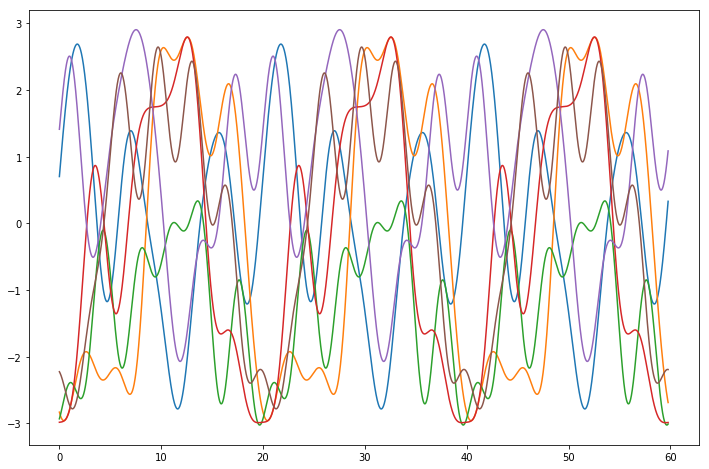

In [43]:
from matplotlib import pyplot as plt
plt.close()

for i in range(q_raw.shape[1]):
    plt.plot(t_raw,q_raw[:,i])

plt.show()

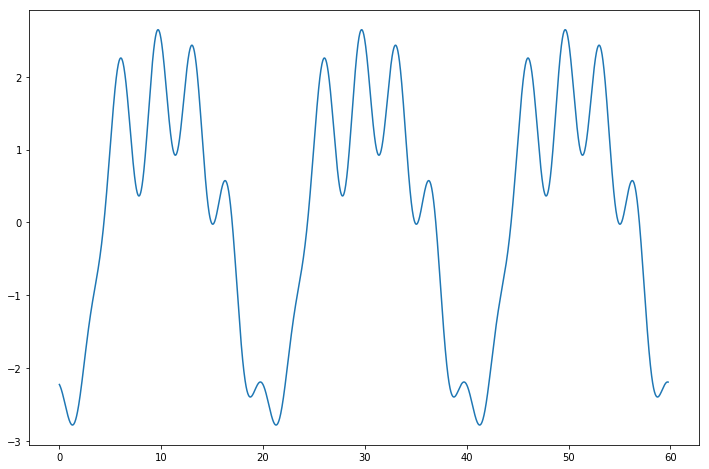

In [44]:
from matplotlib import pyplot as plt
plt.close()

joint = 6
# plt.plot(t_ref+2.6,q_ref[:,joint-1])
plt.plot(t_raw,q_raw[:,joint-1])

plt.show()

### Parameter Load

In [45]:
# with open(datafolder +  'trajectories/traj_shwfl_abq0.pkl', 'rb' ) as file:
#           s_h_wf_l, a_b_q0 = pickle.load(file)

# print(dict(zip(('S', 'h', 'wf', 'L'), s_h_wf_l)))
# print('\n')

from utils import save_data, load_data

training_trajectory_name = 'ur10'


trajectory_folder = datafolder +'trajectories/'
dof, fourier_order, base_freq, traj_optimizer_result, reg_norm_mat = load_data(trajectory_folder,
                                                                               training_trajectory_name)
print("dof: {}".format(dof))
print("Fourier order: {}".format(fourier_order))
print("Base frequency: {}".format(base_freq))

dof: 6
Fourier order: 6
Base frequency: 0.05


### Filter Cut-off Frequency Definition

In [46]:
# times of the highest frequency in the Fourier series
fc_mult = 10.0

fc = base_freq * fourier_order * fc_mult
print("Cut frequency: {}".format(fc))

Cut frequency: 3.0


In [47]:
fc_q = fc
fc_dq = fc
fc_ddq = fc

fc_tau = fc

si = 200
sf = -200

### Data Filtering, Differentiation and Regression Data Generation

In [48]:
rec_h = 0.02 # sampling time

plot shape: 460


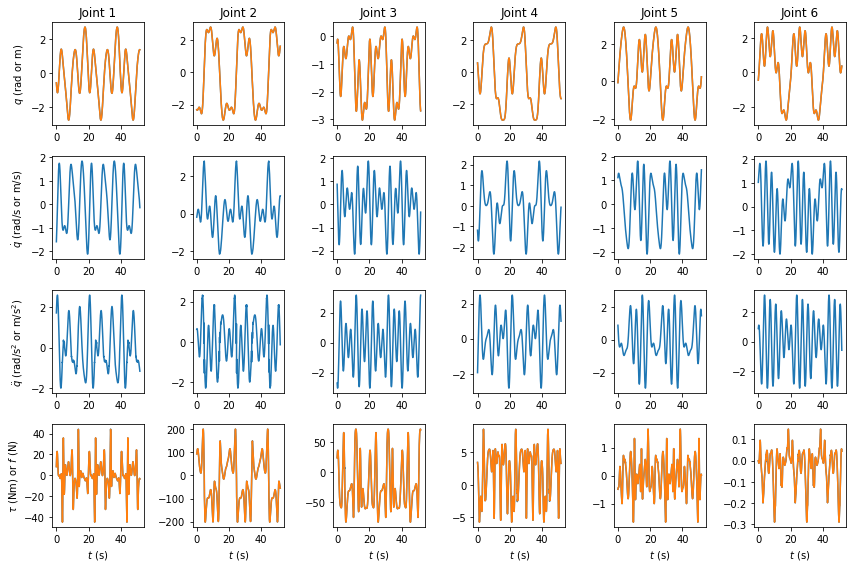

 (cond=27.209247)
save
CPU times: user 611 ms, sys: 9.47 ms, total: 621 ms
Wall time: 468 ms


In [49]:
from support_funcs.regr_data_proc import read_data, diff_and_filt_data, gen_regr_matrices
from support_funcs.utils import _fprint

# t_raw, q_raw, tau_raw, t_ref, q_ref = read_data(dof=rbt.dof, h=rec_h,
#                                                 rbtlogfile=datafolder + 'recdata/rbtlog.dat',
#                                                 trajreffile=datafolder + 'trajectories/traj.dat')

q, dq, ddq, tau = diff_and_filt_data(dof=rbt.dof, h=rec_h,  q_raw=q_raw, tau_raw=tau_raw,
                               fc_q=fc_q, fc_dq=fc_dq, fc_ddq=fc_ddq, fc_tau=fc_tau)

t_raw = t_raw[si:sf]; q_raw = q_raw[si:sf]; tau_raw = tau_raw[si:sf]
q = q[si:sf]; dq = dq[si:sf]; ddq = ddq[si:sf]; tau = tau[si:sf]

t_raw = t_raw - t_raw[0]

t = numpy.array(range(q.shape[0])) * rec_h

W, omega, Q1, R1, rho1 = gen_regr_matrices(rbt, q, dq, ddq, tau)
    

plot_trajectory_data(t, q_raw, q, dq, ddq,tau_raw, tau)

_fprint(' (cond=%f)'%numpy.linalg.cond(W))

_fprint('save')

%time \
numpy.savez_compressed(tmpfolder + 'procdata/raw', t=t_raw, q=q_raw, tau=tau_raw);\
numpy.savez_compressed(tmpfolder + 'procdata/proc', t=t, q=q, dq=dq, ddq=ddq, tau=tau); \
numpy.savez_compressed(tmpfolder + 'procdata/regr', W=W, omega=omega, Q1=Q1, R1=R1, rho1=rho1)

del t_raw, q_raw, tau_raw, t, q, dq, ddq, tau, W, omega, Q1, R1, rho1

### Plot

In [50]:
raw = numpy.load(tmpfolder + 'procdata/raw.npz')
tau_raw = raw['tau']
q_raw = raw['q']
del raw
proc = numpy.load(tmpfolder + 'procdata/proc.npz')
t = proc['t']
tau = proc['tau']
q = proc['q']
dq = proc['dq']
del proc

In [51]:
q.shape

(2590, 6)

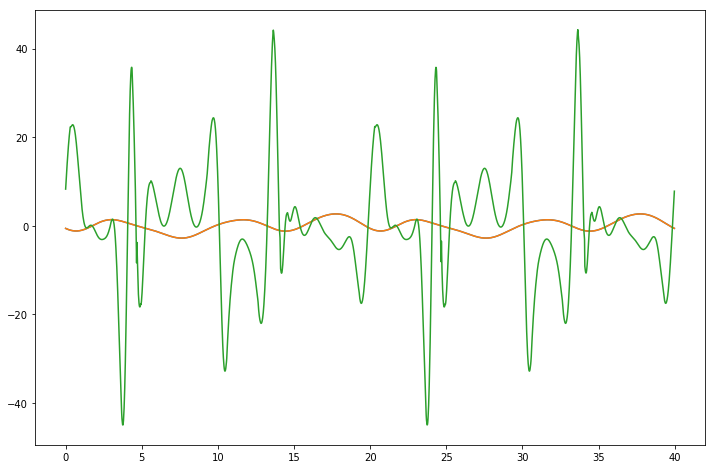

In [52]:
from matplotlib import pyplot as plt
plt.close()

joint = 1
firsts = 2000
plt.plot(t[:firsts],q_raw[:,joint-1][:firsts])
plt.plot(t[:firsts],q[:,joint-1][:firsts])
#plt.plot(t[:firsts],dq[:,joint-1][:firsts])
plt.plot(t[:firsts],tau_raw[:,joint-1][:firsts])

plt.show()

In [53]:
del t, q, dq, tau, q_raw, tau_raw

4 - Near-zero Velocity Data Elimination
=======================================

In [54]:
import numpy

In [55]:
proc = numpy.load(tmpfolder + 'procdata/proc.npz')
dq = proc['dq']
regr = numpy.load(tmpfolder + 'procdata/regr.npz')
omega = numpy.matrix(regr['omega'])
W = numpy.matrix(regr['W'])
del proc, regr

In [56]:
w = omega
v = dq.flatten()
s = len(v)

In [57]:
def selected_regression( obs_mat, output_vec, select_list=None ):
    
    if select_list is None:
        A = obs_mat[:,:]
        b = output_vec[:,:]
    else:
        A = obs_mat[select_list,:]
        b = output_vec[select_list,:]
    
    num = len(b)
    q1,r1 = numpy.linalg.qr(A)
    b1 = q1.T*b
    cond = numpy.linalg.cond(r1)
    x = numpy.linalg.inv(r1.T * r1) * r1.T * b1
    se = b - A*x
    err = numpy.linalg.norm(se)
    relerr = err / numpy.linalg.norm(b)
    mse = err**2/(num-A.shape[1])
    
    return x,se,{'num':num,'cond':cond,'mse':mse, 'relerr':relerr}

In [58]:
list_v_threshold = numpy.arange(0.0, 0.02, 0.002).tolist() + numpy.arange(0.02, 0.08+1e-10, 0.02).tolist()

In [59]:
selections = []
list_props = []
v_db_unc_regr = []
v_num = []
v_cond = []
v_relerr = []
v_mse = []
for idx, v_threshold in enumerate(list_v_threshold):
    r_vel = []
    if True:
        for i,vi in enumerate(v):
            if numpy.abs(vi) >= v_threshold:
                r_vel.append( i )
    else:                
        for i in range(len(v)/rbt.dof):
            elimin = False
            for l in range(rbt.dof):
                vi = v[i*rbt.dof+l]
                if numpy.abs(vi) < v_threshold:
                    elimin = True
            if not elimin:
                r_vel += [i*rbt.dof+l for l in range(rbt.dof)]
    selections.append(r_vel)
    db_unc_regr_vel,se,props = selected_regression( W, w, r_vel )
    list_props.append(props)
    v_db_unc_regr.append(db_unc_regr_vel)
    v_num.append(props['num'])
    v_cond.append(props['cond'])
    v_relerr.append(props['relerr'])
    v_mse.append(props['mse'])
    
    print "%d %.3f %s"%(idx, v_threshold, props)

0 0.000 {'relerr': 0.023425685124297303, 'mse': 1.2212990895750555, 'num': 15540, 'cond': 27.209247246920327}
1 0.002 {'relerr': 0.023433608785061486, 'mse': 1.2221524219967426, 'num': 15519, 'cond': 27.211407904462366}
2 0.004 {'relerr': 0.02344090817259219, 'mse': 1.2227777448861594, 'num': 15499, 'cond': 27.21395394855944}
3 0.006 {'relerr': 0.023443095602965813, 'mse': 1.2234996828798885, 'num': 15480, 'cond': 27.21579548252656}
4 0.008 {'relerr': 0.02345073158042816, 'mse': 1.2244161559478879, 'num': 15455, 'cond': 27.200060261206243}
5 0.010 {'relerr': 0.023448415162668764, 'mse': 1.2265398096910167, 'num': 15401, 'cond': 27.20533661632954}
6 0.012 {'relerr': 0.023442639248129477, 'mse': 1.2280912806918456, 'num': 15364, 'cond': 27.202318177634723}
7 0.014 {'relerr': 0.023448496709009368, 'mse': 1.2296628812342356, 'num': 15331, 'cond': 27.201341922736535}
8 0.016 {'relerr': 0.02344392102404877, 'mse': 1.2312171651522559, 'num': 15291, 'cond': 27.21156427163003}
9 0.018 {'relerr'

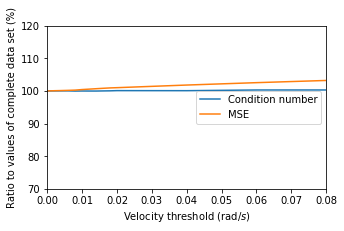

In [60]:
from matplotlib import pyplot as plt

plt.figure(figsize=(5,3))
plt.plot(list_v_threshold,v_cond/v_cond[0]*100, label='Condition number')
plt.plot(list_v_threshold,v_mse/v_mse[0]*100, label='MSE')
#plt.plot(list_v_threshold,v_relerr/v_relerr[0]*100, label='rel err')
plt.legend(loc='right')
plt.axis([0.0,0.08,70,120])
plt.ylabel('Ratio to values of complete data set (%)')
plt.xlabel('Velocity threshold ($\mathrm{rad}/s$)')

plt.show()

In [61]:
threshold_idx = 5

In [62]:
(v_cond[threshold_idx] / v_cond[0]  - 1) * 100.0

-0.014372432119491574

In [63]:
(v_mse[threshold_idx]/v_mse[0] - 1) *100

0.4291102941691882

In [64]:
v_cond[threshold_idx]

27.20533661632954

In [65]:
select = selections[threshold_idx]
threshold = list_v_threshold[threshold_idx]

W_n0v = W[select,:]
omega_n0v = omega[select,:]
    
Q1_n0v,R1_n0v = numpy.linalg.qr(W_n0v)
rho1_n0v = Q1_n0v.T*omega_n0v

In [66]:
%time \
numpy.savez_compressed(tmpfolder + 'procdata/regr_n0v', W=W_n0v, omega=omega_n0v, Q1=Q1_n0v, R1=R1_n0v, rho1=rho1_n0v)

del W, omega, W_n0v, omega_n0v, Q1_n0v, R1_n0v, rho1_n0v

CPU times: user 271 ms, sys: 15.2 ms, total: 286 ms
Wall time: 292 ms


5 - Dynamic Parameter Estimation
================================

In [67]:
import os
import pickle
import sympy
import numpy
import time

import sympybotics
import lmi_sdp

from lmi_sdp import init_lmi_latex_printing
init_lmi_latex_printing()

In [68]:
with open(tmpfolder +  'robotmodels/ur10_model.pkl', 'rb' ) as file:
          rbt = pickle.load( file )

In [69]:
epsilon_safemargin = 1e-30

## LMI Matrix Definitions

In [70]:
dof = rbt.dof

delta = rbt.dyn.dynparms
n_delta = rbt.dyn.n_dynparms

beta = rbt.dyn.baseparms.n()
n_beta = rbt.dyn.n_base
beta_symbs = sympy.Matrix([sympy.Symbol('beta'+str(i+1),real=True) for i in range(n_beta)])

delta_d = (rbt.dyn.Pd.T*delta)
n_delta_d = len(delta_d)

K = rbt.dyn.Pb.T + rbt.dyn.Kd * rbt.dyn.Pd.T

In [71]:
from support_funcs.utils import skew, mrepl
from sympy import BlockMatrix, Matrix, eye, Identity
I = Identity
S = skew

In [72]:
D_inertia_blocks = []
for i in range(dof):
    L = rbt.rbtdef.L[i]
    l = rbt.rbtdef.l[i]
    m = rbt.rbtdef.m[i]
    Di = BlockMatrix([[L,    S(l).T],
                      [S(l), I(3)*m]])
    D_inertia_blocks.append(Di.as_explicit())

In [73]:
# enable auto-reload modules
%load_ext autoreload
%autoreload 2

from sympy import init_printing
init_printing()

D_inertia_blocks[0]

⎡L₁ₓₓ   L_1xy  L_1xz    0    l_1z  -l_1y⎤
⎢                                       ⎥
⎢L_1xy  L_1yy  L_1yz  -l_1z   0     l₁ₓ ⎥
⎢                                       ⎥
⎢L_1xz  L_1yz  L_1zz  l_1y   -l₁ₓ    0  ⎥
⎢                                       ⎥
⎢  0    -l_1z  l_1y    m₁     0      0  ⎥
⎢                                       ⎥
⎢l_1z     0    -l₁ₓ     0     m₁     0  ⎥
⎢                                       ⎥
⎣-l_1y   l₁ₓ     0      0     0     m₁  ⎦


In [74]:
D_other_blocks = []
# for i in range(dof):
#     D_other_blocks.append( Matrix([rbt.rbtdef.fv[i]]) )
#     D_other_blocks.append( Matrix([rbt.rbtdef.fc[i]]) )

In [75]:
D_blocks = D_inertia_blocks + D_other_blocks

In [76]:
init_printing()

D_blocks

⎡⎡L₁ₓₓ   L_1xy  L_1xz    0    l_1z  -l_1y⎤, ⎡L₂ₓₓ   L_2xy  L_2xz    0    l_2z 
⎢⎢                                       ⎥  ⎢                                 
⎢⎢L_1xy  L_1yy  L_1yz  -l_1z   0     l₁ₓ ⎥  ⎢L_2xy  L_2yy  L_2yz  -l_2z   0   
⎢⎢                                       ⎥  ⎢                                 
⎢⎢L_1xz  L_1yz  L_1zz  l_1y   -l₁ₓ    0  ⎥  ⎢L_2xz  L_2yz  L_2zz  l_2y   -l₂ₓ 
⎢⎢                                       ⎥  ⎢                                 
⎢⎢  0    -l_1z  l_1y    m₁     0      0  ⎥  ⎢  0    -l_2z  l_2y    m₂     0   
⎢⎢                                       ⎥  ⎢                                 
⎢⎢l_1z     0    -l₁ₓ     0     m₁     0  ⎥  ⎢l_2z     0    -l₂ₓ     0     m₂  
⎢⎢                                       ⎥  ⎢                                 
⎣⎣-l_1y   l₁ₓ     0      0     0     m₁  ⎦  ⎣-l_2y   l₂ₓ     0      0     0   

 -l_2y⎤, ⎡L₃ₓₓ   L_3xy  L_3xz    0    l_3z  -l_3y⎤, ⎡L₄ₓₓ   L_4xy  L_4xz    0 
      ⎥  ⎢                                       ⎥ 

## LMI Definitions

In [77]:
from lmi_sdp import LMI_PD, LMI

In [78]:
LMIs = list(map(LMI_PD, D_blocks))

In [79]:
init_printing(use_latex=True)

LMIs[0]

⎡L₁ₓₓ   L_1xy  L_1xz    0    l_1z  -l_1y⎤ > 0
⎢                                       ⎥    
⎢L_1xy  L_1yy  L_1yz  -l_1z   0     l₁ₓ ⎥    
⎢                                       ⎥    
⎢L_1xz  L_1yz  L_1zz  l_1y   -l₁ₓ    0  ⎥    
⎢                                       ⎥    
⎢  0    -l_1z  l_1y    m₁     0      0  ⎥    
⎢                                       ⎥    
⎢l_1z     0    -l₁ₓ     0     m₁     0  ⎥    
⎢                                       ⎥    
⎣-l_1y   l₁ₓ     0      0     0     m₁  ⎦    


In [80]:
LMIs_marg = list(map(lambda lm: LMI(lm, epsilon_safemargin*eye(lm.shape[0])) , D_blocks))

In [81]:
init_printing(use_latex=True)
LMIs_marg[0]

⎡L₁ₓₓ   L_1xy  L_1xz    0    l_1z  -l_1y⎤ ≥ ⎡1.0e-30     0        0        0  
⎢                                       ⎥   ⎢                                 
⎢L_1xy  L_1yy  L_1yz  -l_1z   0     l₁ₓ ⎥   ⎢   0     1.0e-30     0        0  
⎢                                       ⎥   ⎢                                 
⎢L_1xz  L_1yz  L_1zz  l_1y   -l₁ₓ    0  ⎥   ⎢   0        0     1.0e-30     0  
⎢                                       ⎥   ⎢                                 
⎢  0    -l_1z  l_1y    m₁     0      0  ⎥   ⎢   0        0        0     1.0e-3
⎢                                       ⎥   ⎢                                 
⎢l_1z     0    -l₁ₓ     0     m₁     0  ⎥   ⎢   0        0        0        0  
⎢                                       ⎥   ⎢                                 
⎣-l_1y   l₁ₓ     0      0     0     m₁  ⎦   ⎣   0        0        0        0  

      0        0   ⎤
                   ⎥
      0        0   ⎥
                   ⎥
      0        0   ⎥
                   ⎥
0   

In [82]:
LMIs_marg[0].canonical()

Matrix([
[L_1xx - 1.0e-30,           L_1xy,           L_1xz,             0,          l_1z,         -l_1y],
[          L_1xy, L_1yy - 1.0e-30,           L_1yz,         -l_1z,             0,          l_1x],
[          L_1xz,           L_1yz, L_1zz - 1.0e-30,          l_1y,         -l_1x,             0],
[              0,           -l_1z,            l_1y, m_1 - 1.0e-30,             0,             0],
[           l_1z,               0,           -l_1x,             0, m_1 - 1.0e-30,             0],
[          -l_1y,            l_1x,               0,             0,             0, m_1 - 1.0e-30]]) >= 0

In [83]:
LMIs_paper = list(map(LMI_PD, D_inertia_blocks))
LMIs_marg_paper = list(map(lambda lm: LMI(lm, epsilon_safemargin*eye(lm.shape[0])) , D_inertia_blocks))

## SDP Solver Interfaces

### [SDPA](http://sdpa.sourceforge.net/)

In [84]:
def sdpa(objf, lmis, variables):
    sdpadat = lmi_sdp.to_sdpa_sparse(objf, lmis, variables)
    with open(tmpfolder + 'sdpa_dat/sdp.dat-s', 'w') as f:
        f.write(sdpadat)
    
    stdout = !sdpa -ds "$tmpfolder"sdpa_dat/sdp.dat-s -o "$tmpfolder"sdpa_dat/sdpa.out -p "$tmpfolder"sdpa_dat/param.sdpa

    outfile = !cat "$tmpfolder"sdpa_dat/sdpa.out
    
    solstart = outfile.index('xVec = ')
    print('\n'.join(outfile[:solstart]))
    
    sol = [float(v) for v in outfile[solstart + 1].replace('{', '').replace('}', '').split(',')]
    return numpy.matrix(sol).T

### [CSDP](https://projects.coin-or.org/Csdp/)

In [21]:
def csdp(objf, lmis, variables):
    sdpadat = lmi_sdp.to_sdpa_sparse(objf, lmis, variables)
    with open(tmpfolder + 'sdpa_dat/sdp.dat-s', 'w') as f:
        f.write(sdpadat)
    
    stdout = !cd "$tmpfolder"sdpa_dat; csdp sdp.dat-s csdp.out
    print('\n'.join(stdout))

    outfile = !cat "$tmpfolder"sdpa_dat/csdp.out
    sol = [float(v) for v in outfile[0].split()]
    return numpy.matrix(sol).T

### [CVXOPT CONELP](http://abel.ee.ucla.edu/cvxopt/userguide/coneprog.html#cvxopt.solvers.sdp)

In [22]:
def cvxopt_conelp(objf, lmis, variables):
    import cvxopt.solvers
    c, Gs, hs = lmi_sdp.to_cvxopt(objf, lmis, variables)
    tic = time.time()
    sdpout = cvxopt.solvers.sdp(c, Gs=Gs, hs=hs)
    toc = time.time()
    print(sdpout['status'])
    print('Elapsed time: %.2f s'%(toc-tic))
    return numpy.matrix(sdpout['x'])

### [Raw SDPA file](http://plato.asu.edu/ftp/sdpa_format.txt)

Can be solved online with the [NEOS SDPA Solver](http://www.neos-server.org/neos/solvers/sdp:SDPA/SPARSE_SDPA.html)

In [85]:
def sdpa_file(objf, lmis, variables):
    sdpadat = lmi_sdp.to_sdpa_sparse(objf, lmis, variables)
    with open(tmpfolder + 'sdpa_dat/sdpa_input.dat-s', 'w') as f:
        f.write(sdpadat)
        
    print("SDPA file saved at: %ssdpa_dat/sdpa_input.dat-s"%tmpfolder)

--------------

Setting the default SDP solver:

In [86]:
solve_sdp = sdpa

## OLS Regression ($\hat{\beta}$)

In [143]:
regr_mats = numpy.load(tmpfolder + 'procdata/regr.npz')
W = numpy.matrix(regr_mats['W'])
omega = numpy.matrix(regr_mats['omega'])
R1 = numpy.matrix(regr_mats['R1'])
rho1 = numpy.matrix(regr_mats['rho1'])

In [144]:
omega.shape[0] / rbt.dof

2590

In [145]:
W.shape

(15540, 36)

In [146]:
numpy.linalg.cond(W)

27.209247246920327

In [147]:
%time beta_ols = (R1.T * R1).I * R1.T * rho1

CPU times: user 10.6 ms, sys: 5.04 ms, total: 15.6 ms
Wall time: 27.5 ms


In [148]:
numpy.savetxt(tmpfolder + 'solutions/beta_ols.dat', beta_ols)

In [149]:
rho2_norm_sqr = numpy.linalg.norm(omega - W * beta_ols)**2

### plot measured and predicted torque 

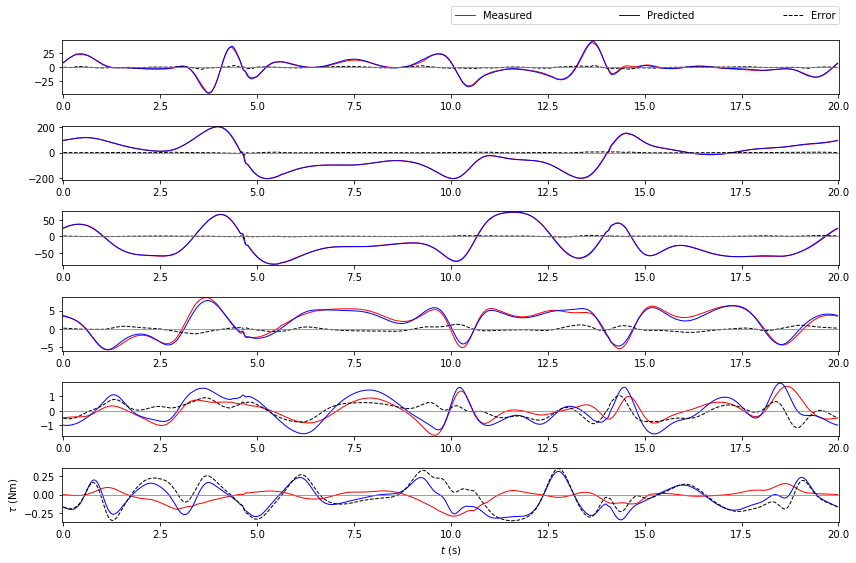

In [150]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,8]

from support_funcs.regr_data_proc import  plot_meas_pred_tau

proc = numpy.load(tmpfolder + 'procdata/proc.npz')
t = proc['t']
tau = proc['tau']

dof = rbt.dof
tau_p = np.zeros(tau.shape)
tau_ps = W.dot(beta_ols)
for i in range(dof):
    tau_p[:, i] = tau_ps[i::dof].flatten()

trajectory_sampling_rate = 50    
plot_data_num = int(1 / base_freq * trajectory_sampling_rate)
plot_meas_pred_tau(t[:plot_data_num], tau[:plot_data_num, :],
                   tau_p[:plot_data_num, :])

## Weighted Least Square (WLS)

In [151]:
proc = numpy.load(tmpfolder + 'procdata/proc.npz')
t = proc['t']
tau = proc['tau']

weight = np.max(tau, axis=0) - np.min(tau, axis=0)
print("weight: ")
print(weight)


# repeat the weight to generate a large vecoter for all the data
weights = 1.0/np.tile(weight, W.shape[0]/weight.shape[0])

weight: 
[ 88.99705478 403.81605109 156.86110743  14.31778922   3.33098609
   0.4382739 ]


In [152]:
weights[0:6]

array([0.01123633, 0.00247638, 0.00637507, 0.06984318, 0.3002114 ,
       2.28167821])

In [153]:
W_wls = np.multiply(W, np.asmatrix(weights).transpose())
omega_wls = np.multiply(omega.T, weights).T
Q1_wls,R1_wls = numpy.linalg.qr(W_wls)
rho1_wls = Q1_wls.T*omega_wls

In [154]:
%time beta_wls = (R1_wls.T * R1_wls).I * R1_wls.T * rho1_wls

CPU times: user 45 ms, sys: 0 ns, total: 45 ms
Wall time: 20 ms


In [155]:
numpy.savetxt(tmpfolder + 'solutions/beta_wls.dat', beta_wls)

In [156]:
rho2_norm_sqr_wls = numpy.linalg.norm(omega_wls - W_wls * beta_wls)**2

### plot measured and predicted torque

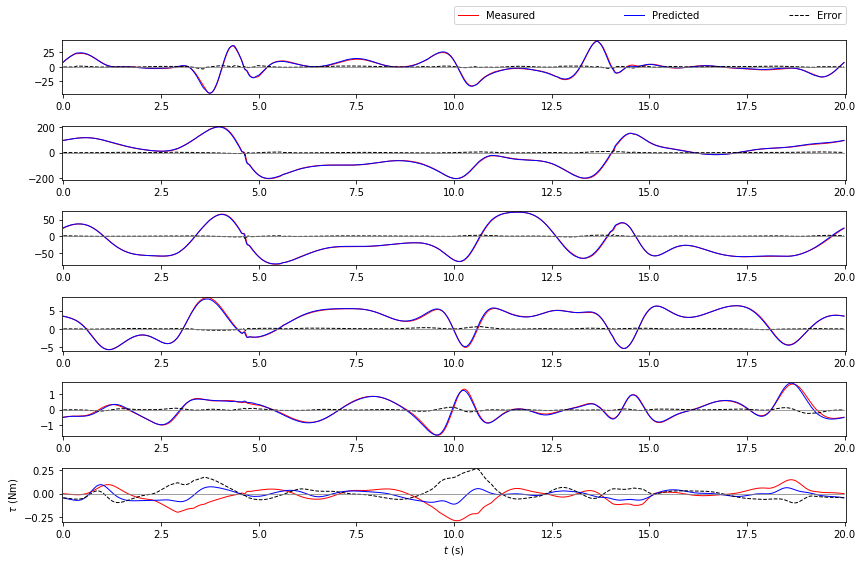

In [157]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,8]

from support_funcs.regr_data_proc import  plot_meas_pred_tau

proc = numpy.load(tmpfolder + 'procdata/proc.npz')
t = proc['t']
tau = proc['tau']

dof = rbt.dof
tau_p = np.zeros(tau.shape)
tau_ps = W.dot(beta_wls)
for i in range(dof):
    tau_p[:, i] = tau_ps[i::dof].flatten()

trajectory_sampling_rate = 50    
plot_data_num = int(1 / base_freq * trajectory_sampling_rate)
plot_meas_pred_tau(t[:plot_data_num], tau[:plot_data_num, :],
                   tau_p[:plot_data_num, :])

## Feasible Parameter Estimation with Ordinary Least Squares ($\delta^\star$)

In [158]:
u = sympy.Symbol('u')
U_rho = BlockMatrix([[Matrix([u - rho2_norm_sqr_wls]), (rho1_wls - R1_wls*K*delta).T],
                     [rho1_wls - R1_wls*K*delta,                       I(n_beta)]])
U_rho = U_rho.as_explicit()

In [159]:
lmis_fpe_ols_paper = [LMI(U_rho)] + LMIs_marg_paper
lmis_fpe_ols_correct = [LMI(U_rho)] + LMIs_marg

In [160]:
variables_fpe_ols = [u] + list(delta)

In [161]:
objf_fpe_ols = u

In [162]:
sol_fpe_ols_paper = sdpa(objf_fpe_ols, lmis_fpe_ols_paper, variables_fpe_ols)

SDPA start at [Sat Oct 27 18:48:10 2018]
param  is tmp/sdpa_dat/param.sdpa 
data   is tmp/sdpa_dat/sdp.dat-s  : sparse
out    is tmp/sdpa_dat/sdpa.out
NumThreads  is set as 1
Schur computation : DENSE 
   mu      thetaP  thetaD  objP      objD      alphaP  alphaD  beta 
 0 1.0e+04 1.0e+00 1.0e+00 -0.00e+00 +4.81e+03 6.0e-01 5.9e-01 2.00e-01
 1 5.0e+03 4.0e-01 4.1e-01 +2.57e+02 -3.18e+03 5.8e-01 5.8e-01 2.00e-01
 2 2.6e+03 1.7e-01 1.7e-01 +6.72e+02 -6.61e+03 6.0e-01 5.9e-01 2.00e-01
 3 1.3e+03 6.8e-02 7.0e-02 +1.14e+03 -8.36e+03 6.5e-01 6.4e-01 2.00e-01
 4 6.2e+02 2.4e-02 2.5e-02 +1.54e+03 -9.13e+03 8.1e-01 7.9e-01 2.00e-01
 5 2.2e+02 4.6e-03 5.2e-03 +1.60e+03 -7.97e+03 9.2e-01 8.4e-01 2.00e-01
 6 6.9e+01 3.6e-04 8.3e-04 +7.90e+02 -3.66e+03 6.3e-01 7.0e-01 2.00e-01
 7 3.0e+01 1.3e-04 2.4e-04 +4.05e+02 -1.59e+03 6.1e-01 7.7e-01 2.00e-01
 8 1.2e+01 5.1e-05 5.7e-05 +2.14e+02 -6.01e+02 5.9e-01 8.4e-01 2.00e-01
 9 4.2e+00 2.1e-05 9.0e-06 +1.32e+02 -1.65e+02 5.8e-01 8.4e-01 2.00e-01
10 1.5e+0

In [163]:
sol_fpe_ols_correct = sdpa(objf_fpe_ols, lmis_fpe_ols_correct, variables_fpe_ols)

SDPA start at [Sat Oct 27 18:48:48 2018]
param  is tmp/sdpa_dat/param.sdpa 
data   is tmp/sdpa_dat/sdp.dat-s  : sparse
out    is tmp/sdpa_dat/sdpa.out
NumThreads  is set as 1
Schur computation : DENSE 
   mu      thetaP  thetaD  objP      objD      alphaP  alphaD  beta 
 0 1.0e+04 1.0e+00 1.0e+00 -0.00e+00 +4.81e+03 6.0e-01 5.9e-01 2.00e-01
 1 5.0e+03 4.0e-01 4.1e-01 +2.57e+02 -3.18e+03 5.8e-01 5.8e-01 2.00e-01
 2 2.6e+03 1.7e-01 1.7e-01 +6.72e+02 -6.61e+03 6.0e-01 5.9e-01 2.00e-01
 3 1.3e+03 6.8e-02 7.0e-02 +1.14e+03 -8.36e+03 6.5e-01 6.4e-01 2.00e-01
 4 6.2e+02 2.4e-02 2.5e-02 +1.54e+03 -9.13e+03 8.1e-01 7.9e-01 2.00e-01
 5 2.2e+02 4.6e-03 5.2e-03 +1.60e+03 -7.97e+03 9.2e-01 8.4e-01 2.00e-01
 6 6.9e+01 3.6e-04 8.3e-04 +7.90e+02 -3.66e+03 6.3e-01 7.0e-01 2.00e-01
 7 3.0e+01 1.3e-04 2.4e-04 +4.05e+02 -1.59e+03 6.1e-01 7.7e-01 2.00e-01
 8 1.2e+01 5.1e-05 5.7e-05 +2.14e+02 -6.01e+02 5.9e-01 8.4e-01 2.00e-01
 9 4.2e+00 2.1e-05 9.0e-06 +1.32e+02 -1.65e+02 5.8e-01 8.4e-01 2.00e-01
10 1.5e+0

In [164]:
u_star_paper = sol_fpe_ols_paper[0,0]
delta_star_paper = numpy.matrix(sol_fpe_ols_paper[1:])

u_star_correct = sol_fpe_ols_correct[0,0]
delta_star_correct = numpy.matrix(sol_fpe_ols_correct[1:])

In [165]:
beta_star_paper = numpy.array(K * delta_star_paper).astype(float)

beta_star_correct = numpy.array(K * delta_star_correct).astype(float)

In [166]:
numpy.linalg.norm(beta_star_paper - beta_star_correct)

0.0

In [167]:
print(" B*paper    B*correct\n")
for i in range(beta_star_correct.shape[0]):
    print("% f  % f"%(beta_star_paper[i], beta_star_correct[i]))

 B*paper    B*correct

 9.855995   9.855995
-5.350841  -5.350841
-0.300901  -0.300901
 0.744196   0.744196
-0.157515  -0.157515
 5.898696   5.898696
 11.838061   11.838061
-0.003825  -0.003825
-3.179510  -3.179510
 0.398424   0.398424
-0.719938  -0.719938
 0.069409   0.069409
 3.375301   3.375301
 6.766977   6.766977
-0.017890  -0.017890
 0.211517   0.211517
-0.012049  -0.012049
 0.049309   0.049309
 0.012649   0.012649
 0.309630   0.309630
 0.002516   0.002516
-0.570991  -0.570991
 0.028239   0.028239
 0.001585   0.001585
 0.013268   0.013268
 0.003169   0.003169
 0.155159   0.155159
-0.000991  -0.000991
 0.089448   0.089448
 0.009439   0.009439
 0.000194   0.000194
 0.007654   0.007654
 0.004208   0.004208
 0.010684   0.010684
-0.001631  -0.001631
 0.002476   0.002476


In [168]:
numpy.savetxt(tmpfolder + 'solutions/delta_star_correct.dat', delta_star_correct)
numpy.savetxt(tmpfolder + 'solutions/beta_star_correct.dat', beta_star_correct)
numpy.savetxt(tmpfolder + 'solutions/delta_star_paper.dat', delta_star_paper)
numpy.savetxt(tmpfolder + 'solutions/beta_star_paper.dat', beta_star_paper)

### plot measured and predicted torque

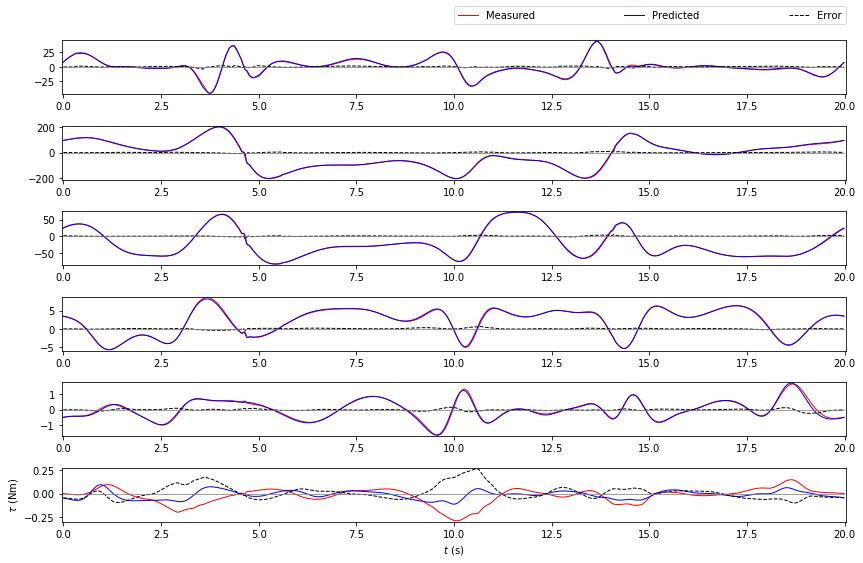

In [169]:
# import matplotlib.pyplot as plt
# plt.rcParams['figure.figsize'] = [12,8]

# proc = numpy.load(tmpfolder + 'procdata/proc.npz')
# t = proc['t']
# tau = proc['tau']

tau_p = np.zeros(tau.shape)
tau_ps = W.dot(beta_star_correct)
for i in range(dof):
    tau_p[:, i] = tau_ps[i::dof].flatten()

plot_data_num = int(1 / base_freq * trajectory_sampling_rate)
plot_meas_pred_tau(t[:plot_data_num], tau[:plot_data_num, :],
                   tau_p[:plot_data_num, :])

# 6 - Solution Double Check

### 1 - LMI Definiteness Test

In [170]:
def  test_lmi_matrix_psd(delta_solution):
    dict_subs = dict(zip(delta, delta_solution))

    test = 'ok'
    for Di in D_blocks:
            m = numpy.matrix(mrepl(Di, dict_subs)).astype(float)
            for v in numpy.linalg.eigvals( m ):
                if v <= 0.0:
                    print(v)
                    test = 'fail'
    print(test)

In [171]:
test_lmi_matrix_psd(numpy.loadtxt(tmpfolder + 'solutions/delta_star_correct.dat').flatten().tolist())

ok


### 2 - Inertia Matrix Definiteness Test

In [172]:
def test_mass_matrix_psd(beta_solution):
    K = rbt.dyn.Pb.T + rbt.dyn.Kd * rbt.dyn.Pd.T
    A = numpy.matrix(K).astype(float)
    b = numpy.matrix(beta_solution).astype(float)
    x = numpy.linalg.pinv(A) * b
    d_test = x
    
    M_func_def = sympybotics.robotcodegen.robot_code_to_func( 'python', rbt.M_code, 'M', 'M_func', rbt.rbtdef)
    exec(M_func_def, globals())
    global sin, cos
    from math import sin, cos
    
    ntests = 10000
    
    ok = 0
    nok = 0
    for i in range(ntests):
        q_test = numpy.random.rand(rbt.dof)
        M_out = M_func( numpy.array(d_test).flatten().tolist(), q_test)
        M = numpy.matrix(M_out).reshape((rbt.dof,rbt.dof))
        try:
            c = numpy.linalg.cholesky(M)
        except:
            nok += 1
            continue
        ok += 1
        
    print 'ok     %8i  %3i%%'%(ok, 100.0*ok/ntests) 
    print 'not ok %8i  %3i%%'%(nok, 100.0*nok/ntests)
    if nok > 0 :
        print('\nNot PSD -> Not feasible!')
    else:
        print('\nSeems feasible.')

In [173]:
beta_ols = numpy.matrix(numpy.loadtxt(tmpfolder + 'solutions/beta_ols.dat')).T
test_mass_matrix_psd(beta_ols)

ok            0    0%
not ok    10000  100%

Not PSD -> Not feasible!


In [174]:
beta_starextra = numpy.matrix(numpy.loadtxt(tmpfolder + 'solutions/beta_star_correct.dat')).T
test_mass_matrix_psd(beta_starextra)

ok        10000  100%
not ok        0    0%

Seems feasible.


7 - Tables
==========

In [175]:
import numpy as np
import sympybotics
import pickle

from collections import OrderedDict
from support_funcs.utils import ListTable

In [176]:
with open(tmpfolder +  'robotmodels/ur10_model.pkl', 'rb' ) as file:
          rbt = pickle.load( file )

In [177]:
def analyse(W, omega, R1, beta):
    from numpy import matrix, mean
    from numpy.linalg import cond, norm
    
    p = dict()
    
    n = W.shape[0]
    
    omega_norm = norm(omega)
    omega_mean = mean(omega)
    
    p['err'] = norm(omega - W * beta)
    p['merr'] = p['err'] / n
    
    p['se'] = p['err']**2
    p['mse'] = p['se']/(n-W.shape[1])
    p['rmse'] = p['mse']**0.5
    
    C = p['mse'] * (R1.T * R1).I
    p['sd'] = np.sqrt(C.diagonal()).T
    p['sd%'] = 100. * p['sd'] / np.abs(beta)
    
    p['relerr'] = p['err']/ omega_norm
    p['relerr%'] = p['relerr']*100.
    
    p['1-r2'] = p['err']**2 / norm(omega - omega_mean)**2
    p['r2'] = 1 - p['1-r2']

    return p
    

In [178]:
betas = OrderedDict([('beta_ols', 'B^'),
                     ('beta_wls', 'B~'),
                     ('beta_star_paper', 'B* paper'),
                     ('beta_star_correct', 'B* correct')])

In [179]:
solutions_beta = {betaname:np.matrix(np.loadtxt(tmpfolder + 'solutions/%s.dat'%(betaname))).T for betaname in betas}

In [180]:
analysis = dict()

from numpy.linalg import cond


regr_mats = np.load(tmpfolder + 'procdata/regr.npz')
W = np.matrix(regr_mats['W'])
omega = np.matrix(regr_mats['omega'])
R1 = np.matrix(regr_mats['R1'])

analysis['cond'] = cond(W)

analysis['betas'] = dict()

for betaname in betas:
    beta = solutions_beta[betaname]
    analysis['betas'][betaname] = analyse(W, omega, R1, beta)

del W, omega, R1

In [181]:
prop = lambda x: x['mse']
form = '%.4f'

table = ListTable()
table.append(['cond'] + betas.values())
row = ['%.0f'%analysis['cond']] + [ form%prop(analysis['betas'][b]) for b in betas]
table.append(row)
table

cond,B^,B~,B* paper,B* correct
27,1.2213,1.6355,1.6355,1.6355


In [182]:
import yaml, sympy
with open(datafolder + 'robotparams/ur10_cad.yml', 'r') as f:
    ur10_cad = yaml.load(f)
delta_cad = sympy.Matrix([ur10_cad.get(str(d), d) for d in rbt.dyn.dynparms])
beta_cad = (rbt.dyn.Pb.T + rbt.dyn.Kd * rbt.dyn.Pd.T) * delta_cad

In [183]:
form = '%.6g'

import sympy

table = ListTable()
header = ['', 'Bcad', 'B^', 'B~', 'B* correct']
table.append(header)
for i, b in enumerate(rbt.dyn.baseparms.n()):
    if beta_cad[i].is_Number:
        cad_v = sympy.N(beta_cad[i], 4)
    elif beta_cad[i].is_Symbol:
        cad_v = '---'
    else:
        cad_v = sympy.N(beta_cad[i], 4)
    row = ['%.7s ...'%b if len(str(b)) > 157 else str(b), cad_v]
    row += [form%solutions_beta['beta_ols'][i,0]]
    row += [form%solutions_beta['beta_wls'][i,0]]
    row += [form%solutions_beta['beta_star_correct'][i,0]]
    table.append(row)
table

,Bcad,B^,B~,B* correct
L_1zz + L_2yy + L_3yy + L_4yy + 0.352*l_2z + 0.096*l_3z + 0.328*l_4z + 0.030976*m_2 + 0.376848*m_3 + 0.728624*m_4 + 0.728624*m_5 + 0.728624*m_6,11.50,10.2065,9.856,9.856
L_2xx - L_2yy - 0.374544*m_3 - 0.374544*m_4 - 0.374544*m_5 - 0.374544*m_6,-6.593,-6.04946,-5.35085,-5.35084
L_2xy,0.0005474,-0.0558178,-0.3009,-0.300901
L_2xz - 0.612*l_3z - 0.612*l_4z + 0.078336*m_3 + 0.007344*m_4 + 0.007344*m_5 + 0.007344*m_6,0.5692,0.533752,0.744196,0.744196
L_2yz,-2.231e-6,0.00942848,-0.157513,-0.157515
L_2zz + 0.374544*m_3 + 0.374544*m_4 + 0.374544*m_5 + 0.374544*m_6,6.949,5.88947,5.89869,5.8987
l_2x + 0.612*m_3 + 0.612*m_4 + 0.612*m_5 + 0.612*m_6,11.84,11.8515,11.8381,11.8381
l_2y,-0.001829,0.0234692,-0.00382504,-0.00382485
L_3xx - L_3yy - 0.327184*m_4 - 0.327184*m_5 - 0.327184*m_6,-3.479,-3.15877,-3.17951,-3.17951
L_3xy,-0.0001999,0.344683,0.398423,0.398424


---------------------------

---------------------------

---------------------------

---------------------------

## Other Stuff

In [184]:
delta_star_correct = np.matrix(np.loadtxt(tmpfolder + 'solutions/delta_star_correct.dat')).T

In [185]:
K = np.matrix(rbt.dyn.Pb.T + rbt.dyn.Kd * rbt.dyn.Pd.T).astype(float)

$$\beta^\star = K\ \delta^\star$$
$$\delta^\star_{min} = pinv(K)\ \beta^\star$$

In [186]:
delta_star_correct_min = np.linalg.pinv( K ) * (K * delta_star_correct)

delta_star_correct_min = np.round(delta_star_correct_min, 10)

$$K\ \delta^\star_{min} == K\ \delta^\star$$

In [187]:
np.testing.assert_array_almost_equal(K * delta_star_correct, K * delta_star_correct_min, 10)

In [188]:
form = '%.6g'

table = ListTable()
header = ['', 'Dcad', 'D* correct (original)', 'D* correct (minimized norm)']
table.append(header)
for i, d in enumerate(rbt.dyn.dynparms):
    if delta_cad[i].is_Number:
        cad_v = sympy.N(delta_cad[i], 4)
    elif delta_cad[i].is_Symbol:
        cad_v = '---'
    else:
        cad_v = sympy.N(delta_cad[i], 4)
    row = ['%.7s ...'%b if len(str(d)) > 7 else str(d), cad_v]
    row += [form%delta_star_correct[i,0]]
    row += [form%delta_star_correct_min[i,0]]
    table.append(row)
table

,Dcad,D* correct (original),D* correct (minimized norm)
L_1xx,0.1561,369238,0
L_1xy,-1.979e-6,-0,-0
L_1xz,5.334e-7,-0,0
L_1yy,0.1560,369238,-0
L_1yz,2.876e-5,-0,0
L_1zz,0.1561,0.0356385,0.447971
l_1x,0.0003783,-0,-0
l_1y,0.02040,-0,0
l_1z,-0.005499,-0,0
m_1,3.900,369238,0


In [189]:
for i in range(delta_star_correct.shape[0]):
     print 'double ' + repr(rbt.dyn.dynparms[i]) + '    =    ' + repr(delta_star_correct_min[i,0]) + ';'

double L_1xx    =    0.0;
double L_1xy    =    -0.0;
double L_1xz    =    0.0;
double L_1yy    =    -0.0;
double L_1yz    =    0.0;
double L_1zz    =    0.4479708855;
double l_1x    =    -0.0;
double l_1y    =    0.0;
double l_1z    =    0.0;
double m_1    =    0.0;
double L_2xx    =    0.0097432346;
double L_2xy    =    -0.3009010304;
double L_2xz    =    0.330541869;
double L_2yy    =    0.4382276509;
double L_2yz    =    -0.1575147075;
double L_2zz    =    0.976339128;
double l_2x    =    3.7949949668;
double l_2y    =    -0.0038248544;
double l_2z    =    0.1576857517;
double m_2    =    0.0138763462;
double L_3xx    =    0.3131728862;
double L_3xy    =    0.3984243248;
double L_3xz    =    -0.0532199979;
double L_3yy    =    0.1347979993;
double L_3yz    =    0.0694089453;
double L_3zz    =    0.0174162035;
double l_3x    =    0.8965495725;
double l_3y    =    -0.017890234;
double l_3z    =    -0.1592864188;
double m_3    =    2.879279872;
double L_4xx    =    0.208351743;
double 

In [190]:
print rbt.rbtdef.description()

RobotDef instance: UR10
  DH parameters - modified convention:
    joint - alpha,  a,  d,  theta
       1  - 0, 0, 0.128, q1
       2  - -pi/2, 0, 0.176, q2 - pi/2
       3  - 0, 0.612, -0.128, q3
       4  - 0, 0.572, 0.116, q4 + pi/2
       5  - pi/2, 0, 0.116, q5
       6  - -pi/2, 0, 0.092, q6
  gravity acceleration: [0.0, 0.0, -9.81]^T
  friction model: {}



---------------------------

---------------------------

---------------------------

---------------------------

---------------------------

---------------------------

---------------------------

---------------------------

---------------------------

### save stuff

In [14]:
def save_files(): 
    from IPython.display import display, Javascript
    Javascript('IPython.notebook.save_notebook()')
    
    import json
    with open('Paper IROS2013 - Phys Feas Dyn Param Ident 7-DOF WAM Rob.ipynb', 'r') as f:
        d = json.load(f)
    with open('README.md', 'w') as f:
        f.write(''.join(d['worksheets'][0]['cells'][0]['source']).encode('UTF-8'))

    !ipython nbconvert Paper\ IROS2013\ -\ Phys\ Feas\ Dyn\ Param\ Ident\ 7-DOF\ WAM\ Rob.ipynb --to html

In [16]:
#save_files()

In [3]:
#!git status

In [12]:
#!git commit -a -m "Add deltas"

In [13]:
#!git push